# **Sentimen Analisis Review Aplikasi di Play Store - AxisNET**

## **Import Library**

In [464]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier

from collections import Counter

from imblearn.over_sampling import SMOTE

pd.options.mode.chained_assignment = None
import numpy as np

seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import datetime as dt
import re
import string
import csv
import requests
from gensim.models import Word2Vec
from io import StringIO
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/refanzzzz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/refanzzzz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/refanzzzz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Loading Dataset**

In [465]:
# Membaca berkas CSV dari hasil scraping
app_reviews_df = pd.read_csv("review-dataset.csv")[:20000]

In [466]:
# Menghitung jumlah baris dan kolom pada DataFrame
reviews_count, columns_count = app_reviews_df.shape

print("Jumlah ulasan: ", reviews_count)
print("Jumlah kolom: ", columns_count)

Jumlah ulasan:  20000
Jumlah kolom:  11


In [467]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,24868505-ec59-4b9f-9814-652642d8cc5b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Hasil Update hanya mengutamakan tampilan saja fungsinya sama saja..sekarang malah lebih ribet dan tidak aman mis: begitu buka aplikasi dan belum Login menunya sudah muncul (transfer, pulsa/data, dompet digital, Kodr QR, BRIZZI, catatan keuangan) ini sangat TIDAK AMAN menurut saya, yg seharusnya Login dulu baru menunya Muncul/tampil. Trims",1,7,2.1.0,2021-01-14 05:05:02,"Hai, Sobat BRI. Mohon maaf atas kendala yang dialami. Untuk tindak lanjut, silakan kirimkan detail kendala melalui email callbri@bri.co.id. Tks~Indah",2025-01-12 18:10:06,2.1.0
1,657c6da2-e0c4-4767-a3ca-5d2e50960e05,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"semakin kesini, apk nya Kebanyakan Bug... makin gak jelasss... masih lebih Ok BCA Mobile di banding BRIMo ini, kacau balau apk nya. securiti prioritasss nya juga Masih sangat minim. rawan maling. tiap saat minta Update, setelah update, malah nge Bug..erorr..alias modyar",1,1,2.82.0,2025-04-26 22:24:20,"Hai Sobat BRI, mohon maaf atas kendala yang dialami. Untuk tindak lanjut, silakan kirimkan detail kendala melalui email callbri@bri.co.id. Jika sudah tidak mengalami kendala, kami harapkan bintang 5 dari Sobat BRI. Tks~Dino",2025-04-26 22:35:28,2.82.0
2,3ce065ad-28a0-46cd-8647-729b84dbac77,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Sehabis update, menu di fast menu selalu berubah lagi, dan selalu menu gak penting yang ditampilkan. Mau diatur ulang selalu minta password dan konfirmasi pin. Kesannya mempersulit pengguna malahan.",2,19,2.82.0,2025-04-22 07:29:41,"Hai Sobat BRI, mohon maaf atas kendala yang dialami. Silahkan kirimkan detail kendala melalui email callbri@bri.co.id. Jika sudah tidak mengalami kendala kami harapkan bintang 5 dari Sobat BRI. Tks~Wila",2025-04-22 07:42:16,2.82.0
3,57ec55d4-d469-4c71-ac9a-248471543189,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"agak unik sih , udah aplikasinya sering update , sering motong saldo pulak ni pihak BRI nya , memang dikit dikit motong nya tapi sering , tau tau ada pemberitahuan , tertulis di situ biaya SMS banking tapi SMS gak ada masuk , ntah biaya SMS apa sebenarnya , memang masalah keamanan dan kenyamanan BCA yg top .",2,83,2.80.0,2025-04-02 07:47:17,"Hai Sobat BRI, mohon maaf atas ketidaknyamanannya. Untuk tindak lanjutnya silakan kirimkan detail kendala melalui email callbri@bri.co.id. Jika sudah tidak mengalami kendala kami harapkan bintang 5 dari Sobat BRI. Tks~Enzy",2025-04-02 09:28:49,2.80.0
4,75294423-80f9-46b7-8f2e-01e08b164d69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"brimo skarang rakus banget, padahal nggak ada SMS apapun yg masuk, tiba² ada notifikasi uang keluar sekian. malah setiap hari lagi keluarnya, apa saldo nggak habis kalo kayak gitu terus tiap hari. nominalnya mmang nggk sberapa tapi kalo setiap hari kyk gitu, dan ketika dijumlahkan dalam sebulan tuh. totalnya hampir 300k perbulannya",1,26,2.81.0,2025-04-21 13:41:24,"Hai Sobat BRI, mohon maaf atas kendala yang dialami. Kami sampaikan SMS notifikasi akan dikenakan biaya Rp750 untuk setiap SMS yang diterima dan akan diakumulasikan 4 hari sekali ya. Untuk tindak lanjutnya silakan kirimkan detail kendala melalui email callbri@bri.co.id. Tks~Helma",2025-04-21 14:05:51,2.81.0


## **Cleaning Dataset**

In [468]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               20000 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  18188 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          19924 non-null  object
 9   repliedAt             19924 non-null  object
 10  appVersion            18188 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [469]:
# Melakukan drop pada kolom yang terdapat null value
clean_df = app_reviews_df.dropna()

# Menampilkan informasi tentang DataFrame clean_df
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18112 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              18112 non-null  object
 1   userName              18112 non-null  object
 2   userImage             18112 non-null  object
 3   content               18112 non-null  object
 4   score                 18112 non-null  int64 
 5   thumbsUpCount         18112 non-null  int64 
 6   reviewCreatedVersion  18112 non-null  object
 7   at                    18112 non-null  object
 8   replyContent          18112 non-null  object
 9   repliedAt             18112 non-null  object
 10  appVersion            18112 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [470]:
# Mengecek apakah ada data yang duplikat
duplicate_count = clean_df.duplicated().sum()
print("Jumlah duplikasi: ", duplicate_count)

Jumlah duplikasi:  0


## **Preprocessing Text**

In [471]:
# Membuat helper function untuk menghapus tanda baca
def remove_punctuation(text):
    # Membuat set yang berisi semua tanda baca
    punctuation_set = set(string.punctuation)

    # Menghapus tanda baca dari teks
    text_without_punctuation = ''

    for char in text:
        if char not in punctuation_set:
            text_without_punctuation += char
        else:
            text_without_punctuation += ' '

    return ' '.join(text_without_punctuation.split())

In [472]:
# Membuat helper function untuk membersihkan teks
def cleaning_text(text):
    text = re.sub(r'[\u00b2\u00b3\u00b9\u2070-\u209f]', '', text)  # Menghapus superscript
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Menghapus hashtag
    text = re.sub(r'RT[\s]+', '', text)  # Menghapus retweet
    text = re.sub(r'http\S+', '', text)  # Menghapus link
    text = re.sub(r'[0-9]+', '', text)  # Menghapus angka
    text = remove_punctuation(text)  # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ')  # Mengganti baris baru dengan spasi
    text = text.strip(' ')  # Menghapus karakter awal dan akhir

    return text

In [473]:
# Membuat helper function untuk mengubah teks menjadi huruf kecil
def casefolding_text(text):
    text = text.lower()
    return text

In [474]:
# Memecah atau membagi string, teks menjadi daftar token
def tokenizing_text(text):
    text = word_tokenize(text)
    return text

In [475]:
# Menghapus stopwords dalam teks
def filtering_text(text):
    list_stopwords = set(stopwords.words('indonesian'))
    list_stopwords1 = set(stopwords.words('english'))

    factory = StopWordRemoverFactory()
    stopwords_sastrawi = factory.get_stop_words()

    general_stopwords = ['iya', 'yaa', 'yaaa', 'nya', 'na', 'sih', 'ku', "di", "ya", "loh", "kah",
                         "woi",
                         "woii", "woy",
                         "anjir", "njir", "deh", "ah", "coy", "wkwkwk", "wkwkwkwk", "cuy", "dehh", "deh", "dh", "donk",
                         "eh", "hahaha", "hehehe", "ih", "lho", "mah", "nge", "ny", "nyaa", "omg", "yah", "yey", "tuh",
                         "apa", "asalamualaikum", "bye", "wr wb", "wr", "wb", "asalamu", "alaikum", "assalamu", "ehh",
                         "eh", "kak", "min", "si", "sih"]

    list_stopwords.update(stopwords_sastrawi)
    list_stopwords.update(list_stopwords1)
    list_stopwords.update(general_stopwords)

    filtered = []

    for txt in text:
        if txt not in list_stopwords:
            filtered.append(txt)

    text = filtered

    return text


In [476]:
# Membuat helper function untuk mengubah kata menjadi kata dasar
def stemming_text(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

In [477]:
# Mengkonversi list kata menjadi kalimat
def to_sentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [478]:
# Mengirim request HTTP untuk mendapatkan berkas CSV dari Github
slangwords_response = requests.get(
    "https://raw.githubusercontent.com/refanz/indonesian-slangwords/master/data/indonesian-slangwords.csv")


# Membuat funngsi untuk membaca hasil response dari Github
def read_data(response):
    dictionary = dict()

    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')

        for row in reader:
            dictionary[row[0]] = int(row[1]) if re.match(r'^-?\d+$', str(row[1])) else row[1]

        return dictionary
    else:
        print("Failed to fetch data from Github")
        return None


slangwords = read_data(slangwords_response)
print(slangwords)

{'@': 'di', 'abis': 'habis', 'wtb': 'beli', 'masi': 'masih', 'wts': 'jual', 'wtt': 'tukar', 'bgt': 'banget', 'maks': 'maksimal', 'plisss': 'tolong', 'bgttt': 'banget', 'indo': 'indonesia', 'bgtt': 'banget', 'ad': 'ada', 'rv': 'redvelvet', 'plis': 'tolong', 'pls': 'tolong', 'cr': 'sumber', 'cod': 'bayar ditempat', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget

In [479]:
# Mengubah kata slang menjadi formal
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [480]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaning_text)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di dalam kolom 'text_casefolding'
clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefolding_text)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefolding'].apply(fix_slangwords)

# Mengulang proses membersihkan teks
clean_df['text_clean'] = clean_df['text_slangwords'].apply(cleaning_text)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di kolom 'text_tokenizing'
clean_df['text_tokenizing'] = clean_df['text_clean'].apply(tokenizing_text)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopwords'] = clean_df['text_tokenizing'].apply(filtering_text)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di kolom 'text_to_sentence'
clean_df['text_final'] = clean_df['text_stopwords'].apply(to_sentence)

In [481]:
# Menampilkan DataFrame clean_df setelah dilakukan pemrosesan teks
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_slangwords,text_tokenizing,text_stopwords,text_final
0,24868505-ec59-4b9f-9814-652642d8cc5b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Hasil Update hanya mengutamakan tampilan saja fungsinya sama saja..sekarang malah lebih ribet dan tidak aman mis: begitu buka aplikasi dan belum Login menunya sudah muncul (transfer, pulsa/data, dompet digital, Kodr QR, BRIZZI, catatan keuangan) ini sangat TIDAK AMAN menurut saya, yg seharusnya Login dulu baru menunya Muncul/tampil. Trims",1,7,2.1.0,2021-01-14 05:05:02,"Hai, Sobat BRI. Mohon maaf atas kendala yang dialami. Untuk tindak lanjut, silakan kirimkan detail kendala melalui email callbri@bri.co.id. Tks~Indah",2025-01-12 18:10:06,2.1.0,hasil update hanya mengutamakan tampilan saja fungsinya sama saja sekarang bahkan lebih ribet dan tidak aman mis begitu buka aplikasi dan belum login menunya sudah muncul transfer pulsa data dompet digital kodr qr brizzi catatan keuangan ini sangat tidak aman menurut saya yang seharusnya login dulu baru menunya muncul tampil terima kasih,hasil update hanya mengutamakan tampilan saja fungsinya sama saja sekarang malah lebih ribet dan tidak aman mis begitu buka aplikasi dan belum login menunya sudah muncul transfer pulsa data dompet digital kodr qr brizzi catatan keuangan ini sangat tidak aman menurut saya yg seharusnya login dulu baru menunya muncul tampil trims,hasil update hanya mengutamakan tampilan saja fungsinya sama saja sekarang bahkan lebih ribet dan tidak aman mis begitu buka aplikasi dan belum login menunya sudah muncul transfer pulsa data dompet digital kodr qr brizzi catatan keuangan ini sangat tidak aman menurut saya yang seharusnya login dulu baru menunya muncul tampil terima kasih,"[hasil, update, hanya, mengutamakan, tampilan, saja, fungsinya, sama, saja, sekarang, bahkan, lebih, ribet, dan, tidak, aman, mis, begitu, buka, aplikasi, dan, belum, login, menunya, sudah, muncul, transfer, pulsa, data, dompet, digital, kodr, qr, brizzi, catatan, keuangan, ini, sangat, tidak, aman, menurut, saya, yang, seharusnya, login, dulu, baru, menunya, muncul, tampil, terima, kasih]","[hasil, update, mengutamakan, tampilan, fungsinya, ribet, aman, mis, buka, aplikasi, login, menunya, muncul, transfer, pulsa, data, dompet, digital, kodr, qr, brizzi, catatan, keuangan, aman, login, menunya, muncul, tampil, terima, kasih]",hasil update mengutamakan tampilan fungsinya ribet aman mis buka aplikasi login menunya muncul transfer pulsa data dompet digital kodr qr brizzi catatan keuangan aman login menunya muncul tampil terima kasih
1,657c6da2-e0c4-4767-a3ca-5d2e50960e05,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"semakin kesini, apk nya Kebanyakan Bug... makin gak jelasss... masih lebih Ok BCA Mobile di banding BRIMo ini, kacau balau apk nya. securiti prioritasss nya juga Masih sangat minim. rawan maling. tiap saat minta Update, setelah update, malah nge Bug..erorr..alias modyar",1,1,2.82.0,2025-04-26 22:24:20,"Hai Sobat BRI, mohon maaf atas kendala yang dialami. Untuk tindak lanjut, silakan kirimkan detail kendala melalui email callbri@bri.co.id. Jika sudah tidak mengalami kendala, kami harapkan bintang 5 dari Sobat BRI. Tks~Dino",2025-04-26 22:35:28,2.82.0,semakin kesini aplikasi nya kebanyakan bug makin tidak jelasss masih lebih ok bca mobile di banding brimo ini kacau balau aplikasi nya securiti prioritasss nya juga masih sangat minim rawan maling tiap saat minta update setelah update bahkan nge bug erorr alias modyar,semakin kesini apk nya kebanyakan bug makin gak jelasss masih lebih ok bca mobile di banding brimo ini kacau balau apk nya securiti prioritasss nya juga masih sangat minim rawan maling tiap saat minta update setelah 

In [482]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18112 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              18112 non-null  object
 1   userName              18112 non-null  object
 2   userImage             18112 non-null  object
 3   content               18112 non-null  object
 4   score                 18112 non-null  int64 
 5   thumbsUpCount         18112 non-null  int64 
 6   reviewCreatedVersion  18112 non-null  object
 7   at                    18112 non-null  object
 8   replyContent          18112 non-null  object
 9   repliedAt             18112 non-null  object
 10  appVersion            18112 non-null  object
 11  text_clean            18112 non-null  object
 12  text_casefolding      18112 non-null  object
 13  text_slangwords       18112 non-null  object
 14  text_tokenizing       18112 non-null  object
 15  text_stopwords        18112 non-null  obj

## **Labeling**

In [483]:
# Mengirim request HTTP untuk mendapatkan berkas CSV dari Github
http_response_1 = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv")

# Mengirim request HTTP untuk mendapatkan berkas CSV dari Github
http_response_2 = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv")

lexicon_positive = read_data(http_response_1)
lexicon_negative = read_data(http_response_2)

In [484]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score = score + lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score = score + lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [485]:
results = clean_df['text_stopwords'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
labeled_df = clean_df.copy()

labeled_df['polarity_score'] = results[0]
labeled_df["polarity"] = results[1]

print(labeled_df['polarity'].value_counts())

polarity
negative    10472
positive     6333
neutral      1307
Name: count, dtype: int64


In [486]:
labeled_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_slangwords,text_tokenizing,text_stopwords,text_final,polarity_score,polarity
0,24868505-ec59-4b9f-9814-652642d8cc5b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Hasil Update hanya mengutamakan tampilan saja fungsinya sama saja..sekarang malah lebih ribet dan tidak aman mis: begitu buka aplikasi dan belum Login menunya sudah muncul (transfer, pulsa/data, dompet digital, Kodr QR, BRIZZI, catatan keuangan) ini sangat TIDAK AMAN menurut saya, yg seharusnya Login dulu baru menunya Muncul/tampil. Trims",1,7,2.1.0,2021-01-14 05:05:02,"Hai, Sobat BRI. Mohon maaf atas kendala yang dialami. Untuk tindak lanjut, silakan kirimkan detail kendala melalui email callbri@bri.co.id. Tks~Indah",2025-01-12 18:10:06,2.1.0,hasil update hanya mengutamakan tampilan saja fungsinya sama saja sekarang bahkan lebih ribet dan tidak aman mis begitu buka aplikasi dan belum login menunya sudah muncul transfer pulsa data dompet digital kodr qr brizzi catatan keuangan ini sangat tidak aman menurut saya yang seharusnya login dulu baru menunya muncul tampil terima kasih,hasil update hanya mengutamakan tampilan saja fungsinya sama saja sekarang malah lebih ribet dan tidak aman mis begitu buka aplikasi dan belum login menunya sudah muncul transfer pulsa data dompet digital kodr qr brizzi catatan keuangan ini sangat tidak aman menurut saya yg seharusnya login dulu baru menunya muncul tampil trims,hasil update hanya mengutamakan tampilan saja fungsinya sama saja sekarang bahkan lebih ribet dan tidak aman mis begitu buka aplikasi dan belum login menunya sudah muncul transfer pulsa data dompet digital kodr qr brizzi catatan keuangan ini sangat tidak aman menurut saya yang seharusnya login dulu baru menunya muncul tampil terima kasih,"[hasil, update, hanya, mengutamakan, tampilan, saja, fungsinya, sama, saja, sekarang, bahkan, lebih, ribet, dan, tidak, aman, mis, begitu, buka, aplikasi, dan, belum, login, menunya, sudah, muncul, transfer, pulsa, data, dompet, digital, kodr, qr, brizzi, catatan, keuangan, ini, sangat, tidak, aman, menurut, saya, yang, seharusnya, login, dulu, baru, menunya, muncul, tampil, terima, kasih]","[hasil, update, mengutamakan, tampilan, fungsinya, ribet, aman, mis, buka, aplikasi, login, menunya, muncul, transfer, pulsa, data, dompet, digital, kodr, qr, brizzi, catatan, keuangan, aman, login, menunya, muncul, tampil, terima, kasih]",hasil update mengutamakan tampilan fungsinya ribet aman mis buka aplikasi login menunya muncul transfer pulsa data dompet digital kodr qr brizzi catatan keuangan aman login menunya muncul tampil terima kasih,-13,negative
1,657c6da2-e0c4-4767-a3ca-5d2e50960e05,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"semakin kesini, apk nya Kebanyakan Bug... makin gak jelasss... masih lebih Ok BCA Mobile di banding BRIMo ini, kacau balau apk nya. securiti prioritasss nya juga Masih sangat minim. rawan maling. tiap saat minta Update, setelah update, malah nge Bug..erorr..alias modyar",1,1,2.82.0,2025-04-26 22:24:20,"Hai Sobat BRI, mohon maaf atas kendala yang dialami. Untuk tindak lanjut, silakan kirimkan detail kendala melalui email callbri@bri.co.id. Jika sudah tidak mengalami kendala, kami harapkan bintang 5 dari Sobat BRI. Tks~Dino",2025-04-26 22:35:28,2.82.0,semakin kesini aplikasi nya kebanyakan bug makin tidak jelasss masih lebih ok bca mobile di banding brimo ini kacau balau aplikasi nya securiti prioritasss nya juga masih sangat minim rawan maling tiap saat minta update setelah update bahkan nge bug erorr alias modyar,semakin kesini apk nya kebanyakan bug makin gak jelasss masih lebih ok bca mobile di banding brimo ini kacau balau apk nya securiti prioritasss nya juga masih sangat minim rawan m

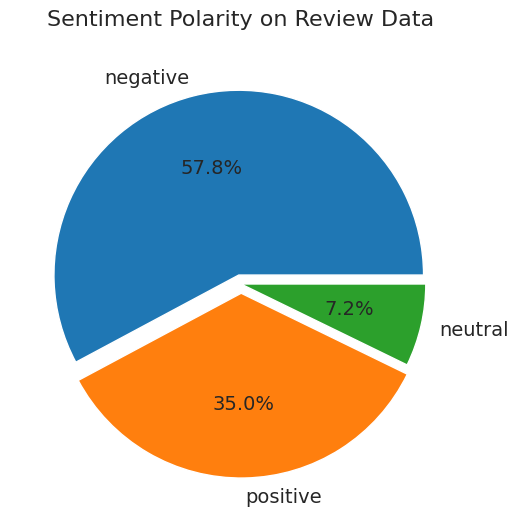

In [487]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyumpannya dalam list sizes
sizes = [count for count in labeled_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyumpannya dalam list labels
labels = list(labeled_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.05 artinya potongan pertama dan kedua akan sedikit terpisah)
explode = (0.05, 0.05, 0)

# Membuat pie chart dengan data 'sizes' dan 'labels' dan 'explodes' yang telah ditentukan
ax.pie(
    x=sizes,
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
)

# Memberikan judul pada pie chart
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart
plt.show()

## **Label Exploration**

In [488]:
def generate_tweets(polarity):
    # Mengatur opsi tampilan Pandas agar kolom dapat menapilkan teks hingga 3000 karakter
    pd.set_option('display.max_colwidth', 3000)

    # Membuat DataFrame baru 'tweets_df' yang hanya berisi tweet dengan polaritas yand ditentukan melalui parameter
    tweets_df = labeled_df[labeled_df['polarity'] == polarity]

    # Memilih kolom-kolom tertentu dari DataFrame tweets_df
    tweets_df = tweets_df[['text_final', 'polarity', 'polarity_score', 'text_stopwords']]

    # Mengurutkan DataFrame teweets_df berdasarkan 'polarity_score' secara descending
    tweets_df = tweets_df.sort_values(by='polarity_score', ascending=False)

    # Mengatur ulamg indeks DataFrame agar dimulai dari 0
    tweets_df = tweets_df.reset_index(drop=True)

    # Menambahkan 1 ke semua indeks DataFrame
    tweets_df.index += 1
    return tweets_df

In [489]:
 def show_wordcloud_from_tweets(tweets, title):
    # Membuat string kosong untuk mengumpulkan kata dari teks yang sudah dibersihkan
    list_words = ""

    # Iterasi setiap tweet
    for tweet in tweets:
        # Iterasi setiap kata dalam tweet
        for word in tweet:
            # Menambahkan kata ke dalam list_words
            list_words += word + " "

    # Membuat objek WordCloud dengan parameter tertentu
    workcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

    # Membuat gambar dan sumbu untuk menmpikan word cloud
    fig, ax = plt.subplots(figsize=(8, 6))

    # Menetapkan judul untuk word cloud
    ax.set_title(title, fontsize=18)

    # Mematikan grid pada sumbu
    ax.grid(False)

    # Menampilkan word cloud dalam gambar
    ax.imshow(workcloud)

    # Mengatur layout gambar
    fig.tight_layout(pad=0)

    # Menyembunyikan sumbu pada word cloud
    ax.axis("off")

    # Menampikan word cloud
    plt.show()

In [490]:
# Menyiapkan positive tweets
positive_tweets = generate_tweets('positive')

# Menyiapkan negative tweets
negative_tweets = generate_tweets('negative')

# Menyiapakan netral tweets
neutral_tweets = generate_tweets('neutral')

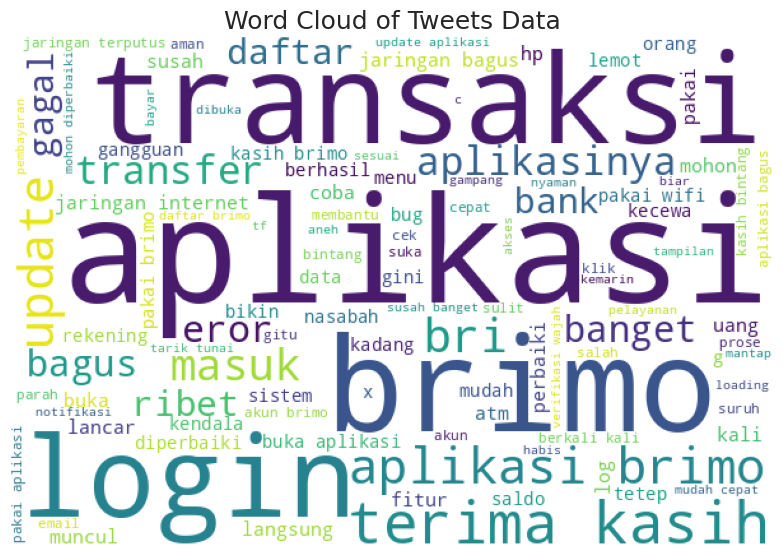

In [491]:
# Menampikan semua kata
show_wordcloud_from_tweets(labeled_df["text_stopwords"], title="Word Cloud of Tweets Data")

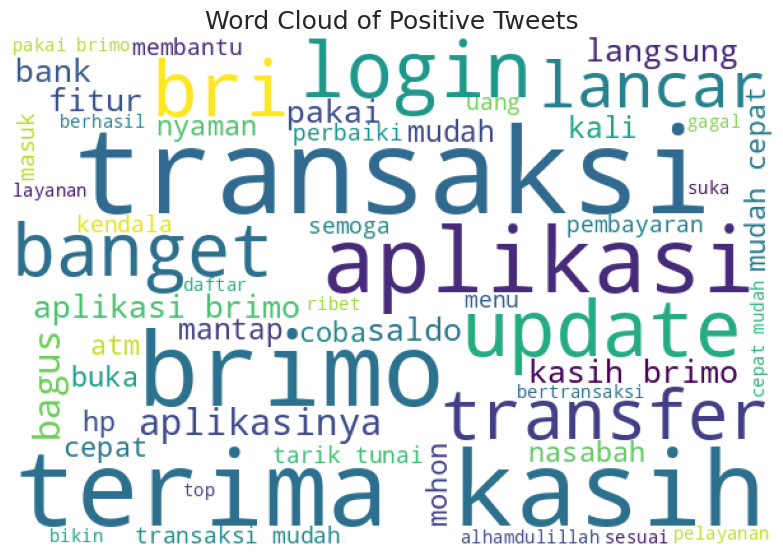

In [492]:
# Menampikan word cloud positif
show_wordcloud_from_tweets(positive_tweets['text_stopwords'], title="Word Cloud of Positive Tweets")

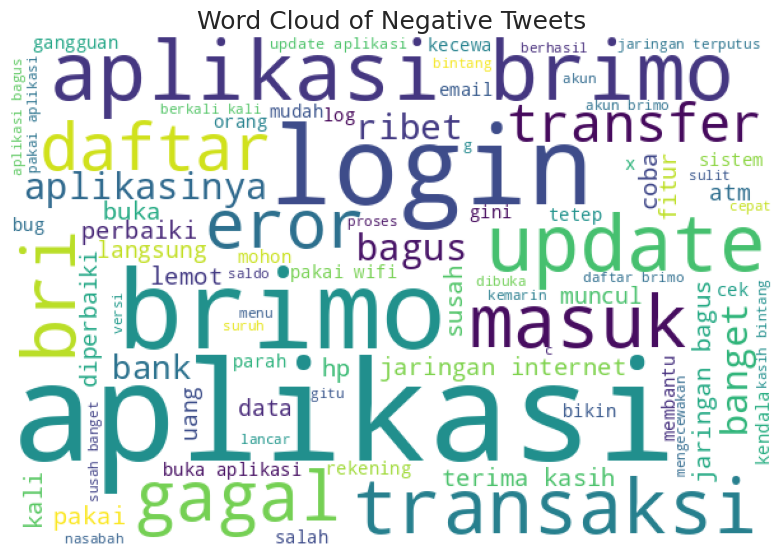

In [493]:
# Menampilkan word cloud negatif
show_wordcloud_from_tweets(negative_tweets['text_stopwords'], title="Word Cloud of Negative Tweets")

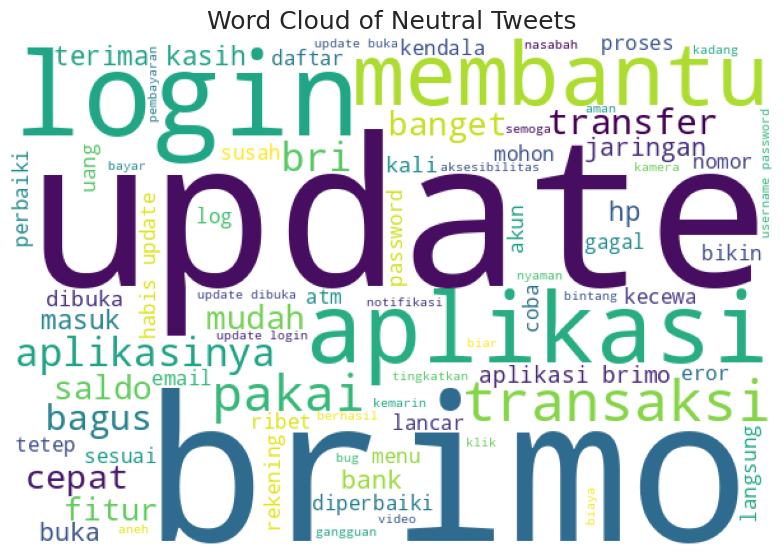

In [494]:
# Menampilkan word cloud netral
show_wordcloud_from_tweets(neutral_tweets['text_stopwords'], title="Word Cloud of Neutral Tweets")

## **Feature Extraction, Splitting Data, and Modeling**

In [522]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = labeled_df['text_final']
y = labeled_df['polarity']

# Encoding fitur target
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Counter(y)

Counter({0: 10472, 2: 6333, 1: 1307})

### **Experiment 1 (SVM, TF-IDF, 80/20)**

#### **Feature Extraction**

In [515]:
# Ekstraksi fitur dengan TF-IDF
tfidf_svm = TfidfVectorizer(max_features=400, min_df=20, max_df=0.8, ngram_range=(1, 2))
X_tfidf_svm = tfidf_svm.fit_transform(X)

# Konversi hasil ekstra
features_df = pd.DataFrame(X_tfidf_svm.toarray(), columns=tfidf_svm.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akses,aksesibilitas,aktif,aktifkan,aktivitas,akun,akun brimo,alasan,alhamdulillah,...,verifikasi,verifikasi wajah,versi,versi terbaru,via,video,vidio,wajah,whatsapp,wifi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **SMOTE Oversampling**

In [518]:
def smote_oversampling(X_data, y_data, strategy='auto'):
    # Melihat distribusi kelas
    print("Distribusi kelas sebelum SMOTE: ", Counter(y))

    # Inisialisasi SMOTE
    smote = SMOTE(random_state=42, sampling_strategy=strategy)

    # Melakukan oversampling pada dataset
    X_resampled, y_resampled = smote.fit_resample(X_data, y_data)

    # Menampilkan distribusi kelas setelah SMOTE
    print("Distribusi kelas setelah SMOTE: ", Counter(y_resampled))

    return X_resampled, y_resampled


X_resampled_svm, y_resampled_svm = smote_oversampling(X_tfidf_svm, y, strategy={
    2: 9000,
    1: 5000
})

Distribusi kelas sebelum SMOTE:  Counter({0: 10472, 2: 6333, 1: 1307})
Distribusi kelas setelah SMOTE:  Counter({0: 10472, 2: 9000, 1: 5000})


#### **Spliting Data**

In [529]:
# Membagi data menjadi data latih dan data uji
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_tfidf_svm, y, test_size=0.2, random_state=42)

#### **Building Model**

In [520]:
# Membuat objek model SVM
svm = SVC(random_state=42)

# Melatih model SVM pada data pelatihan
svm.fit(X_train_svm.toarray(), y_train_svm)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm.predict(X_train_svm.toarray())
y_pred_test_svm = svm.predict(X_test_svm.toarray())

# Evaluasi akurasi model SVM
accuracy_score_train_svm = accuracy_score(y_pred_train_svm, y_train_svm)
accuracy_score_test_svm = accuracy_score(y_pred_test_svm, y_test_svm)

# Menampilkan akurasi
print(f"SVM - accuracy_train: {accuracy_score_train_svm:.2f} ")
print(f"SVM - accuracy_test: {accuracy_score_test_svm:.2f}", )

SVM - accuracy_train: 0.93 
SVM - accuracy_test: 0.85


### **Experiment 2 (SVM, BoW, 70/30)**

#### **Feature Extraction**

In [530]:
# Inisialisasi object CountVectorizer
count_vectorizer = CountVectorizer(max_features=400, min_df=20, max_df=0.8, ngram_range=(1, 2))

# Ekstraksi fitur dengan CountVectorizer
bow_matrix = count_vectorizer.fit_transform(X)

# Konversi hasil ekstra
features_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akses,aksesibilitas,aktif,aktifkan,aktivitas,akun,akun brimo,alasan,alhamdulillah,...,verifikasi,verifikasi wajah,versi,versi terbaru,via,video,vidio,wajah,whatsapp,wifi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **SMOTE Oversampling**

In [532]:
X_resampled_svm2, y_resampled_svm2 = smote_oversampling(bow_matrix, y, strategy={
    2: 8000,
    1: 2500
})

Distribusi kelas sebelum SMOTE:  Counter({0: 10472, 2: 6333, 1: 1307})
Distribusi kelas setelah SMOTE:  Counter({0: 10472, 2: 8000, 1: 2500})


#### **Splitting Data**

In [533]:
# Membagi data menjadi data latih dan data uji
X_train_svm2, X_test_svm2, y_train_svm2, y_test_svm2 = train_test_split(X_resampled_svm2, y_resampled_svm2,
                                                                        test_size=0.3, random_state=42)

#### **Building Model**

In [534]:
# Mambuat objek model Naive Bayes
svm2 = SVC(random_state=42)

# Melatih model Naive Bayes pada data pelatihan
svm2.fit(X_train_svm2, y_train_svm2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm2 = svm2.predict(X_train_svm2)
y_pred_test_svm2 = svm2.predict(X_test_svm2)

# Menghitung nilai akurasi dari model Naive Bayes
accuracy_score_train_svm2 = accuracy_score(y_pred_train_svm2, y_train_svm2)
accuracy_score_test_svm2 = accuracy_score(y_pred_test_svm2, y_test_svm2)

# Menampilkan nilai akurasi
print(f"SVM 2 - accuracy_train: {accuracy_score_train_svm2:.2f}")
print(f"SVM 2 - accuracy_test: {accuracy_score_test_svm2:.2f}")

SVM 2 - accuracy_train: 0.91
SVM 2 - accuracy_test: 0.85


### **Experiment 3 (Logistic Regsression, TF-IDF, 80/20)**

#### **Feature Extraction**

In [535]:
# Ekstraksi fitur dengan TF-IDF
tfidf_lr = TfidfVectorizer(max_features=400, min_df=20, max_df=0.8, ngram_range=(1, 2))
X_tfidf_lr = tfidf_lr.fit_transform(X)

# Konversi hasil ekstra
features_df = pd.DataFrame(X_tfidf_lr.toarray(), columns=tfidf_lr.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akses,aksesibilitas,aktif,aktifkan,aktivitas,akun,akun brimo,alasan,alhamdulillah,...,verifikasi,verifikasi wajah,versi,versi terbaru,via,video,vidio,wajah,whatsapp,wifi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **SMOTE Oversampling**

In [537]:
X_resampled_lr, y_resampled_lr = smote_oversampling(X_tfidf_lr, y, strategy={
    2: 8000,
    1: 2500
})

Distribusi kelas sebelum SMOTE:  Counter({0: 10472, 2: 6333, 1: 1307})
Distribusi kelas setelah SMOTE:  Counter({0: 10472, 2: 8000, 1: 2500})


#### **Splitting Data**

In [538]:
# Membagi data menjadi data latih dan data uji
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_resampled_lr, y_resampled_lr, test_size=0.2,
                                                                random_state=42)

#### **Building Model**

In [539]:
# Membuaat model Linear Regression
lr = LogisticRegression(random_state=42)

# Melatih model Linear Regression pada data pelatihan
lr.fit(X_train_lr, y_train_lr)

# prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = lr.predict(X_train_lr)
y_pred_test_lr = lr.predict(X_test_lr)

# Evaluasi akurasi model Linear Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_lr)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_lr)

# Menampilkan akurasi
print(f"Logistic Regression - accuracy_train: {accuracy_train_lr:.2f}")
print(f"Logistic Regression - accuracy_test: {accuracy_test_lr:.2f}")

Logistic Regression - accuracy_train: 0.87
Logistic Regression - accuracy_test: 0.86


## **Model Evaluation**

In [540]:
# Menghitung MSE untuk data latih dan data uji pada percobaan 1
train_mse_svm = mean_squared_error(y_train_svm, y_pred_train_svm)
test_mse_svm = mean_squared_error(y_test_svm, y_pred_test_svm)

# Menghitung MSE untuk data latih dan data uji pada percobaan 2
train_mse_svm2 = mean_squared_error(y_train_svm2, y_pred_train_svm2)
test_mse_svm2 = mean_squared_error(y_test_svm2, y_pred_test_svm2)

# Menghitung MSE untuk data latih dan data uji percobaan 3
train_mse_lr = mean_squared_error(y_train_lr, y_pred_train_lr)
test_mse_lr = mean_squared_error(y_test_lr, y_pred_test_lr)

# Menampilkan hasil MSE
print(f"Training MSE for SVM: {train_mse_svm:.2f}")
print(f"Test MSE for SVM: {test_mse_svm:.2f}")
print(f"Training MSE for SVM 2: {train_mse_svm2:.2f}")
print(f"Test MSE for SVM 2: {test_mse_svm2:.2f}")
print(f"Training MSE for Logistic Regression: {train_mse_lr:.2f}")
print(f"Test MSE for Logistic Regresion: {test_mse_lr:.2f}")

Training MSE for SVM: 0.15
Test MSE for SVM: 0.39
Training MSE for SVM 2: 0.17
Test MSE for SVM 2: 0.39
Training MSE for Logistic Regression: 0.29
Test MSE for Logistic Regresion: 0.34


In [542]:
# Menggunakan cross-validation dengan 5 fold pada model SVM
cross_val_scores_svm = cross_val_score(svm, X_train_svm, y_train_svm, cv=5, scoring='neg_mean_squared_error')

# Menggunakan cross-validation dengan 5 fold pada model Random Forest
cross_val_scores_svm2 = cross_val_score(svm2, X_train_svm2, y_train_svm2, cv=5,
                                        scoring='neg_mean_squared_error')

# Menggunakan cross-validation dengan 5 fold pada model Logistic Regression
cross_val_scores_lr = cross_val_score(lr, X_train_lr, y_train_lr, cv=5, scoring='neg_mean_squared_error')

# Menampilkan hasil cross-validation
print(f"Cross-Validation MSE for SVM: {-cross_val_scores_svm.mean()}")
print(f"Cross-Validation MSE for SVM 2: {-cross_val_scores_svm2.mean()}")
print(f"Cross-Validation MSE for LR: {-cross_val_scores_lr.mean()}")

Cross-Validation MSE for SVM: 0.38353126065302073
Cross-Validation MSE for SVM 2: 0.41314713896457766
Cross-Validation MSE for LR: 0.33504223145501794


## **Hyperparameter Tunning**

In [543]:
# Definisikan paramater grid untuk Grid Search
param_grid_svm = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10]
}

# Inisialisasi GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, n_jobs=1, verbose=2)
grid_search_svm.fit(X_train_svm, y_train_svm)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search_svm.best_params_}")
best_svm_grid = grid_search_svm.best_estimator_

# Evalusasi performa model pada test set
grid_search_score_svm = best_svm_grid.score(X_test_svm, y_test_svm)
print(f"Accuracy SVM after Grid Search: {grid_search_score_svm:.2f}")

# Menyimpan hyperparameter terbaik pada variabel
best_c = grid_search_svm.best_params_['C']
best_kernel = grid_search_svm.best_params_['kernel']

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   7.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   8.9s
[CV] END ...............................C=0.1, kernel=linear; total time=   8.5s
[CV] END .................................C=1, kernel=linear; total time=   8.2s
[CV] END .................................C=1, kernel=linear; total time=   7.9s
[CV] END .................................C=1, kernel=linear; total time=   7.6s
[CV] END ................................C=10, kernel=linear; total time=   6.1s
[CV] END ................................C=10, kernel=linear; total time=   6.5s
[CV] END ................................C=10, kernel=linear; total time=   6.4s
Best parameters (Grid Search): {'C': 10, 'kernel': 'linear'}
Accuracy SVM after Grid Search: 0.87


In [544]:
# Definisilan paramter grid untuk Grid Search
param_grid_svm2 = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10]
}

# Inisialisasi GridSearchCV
grid_search_svm2 = GridSearchCV(svm2, param_grid_svm2, cv=3, n_jobs=1, verbose=2)
grid_search_svm2.fit(X_train_svm2, y_train_svm2)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search_svm2.best_params_}")
best_svm2_grid = grid_search_svm2.best_estimator_

# Evaluasi performa model pada test set
grid_search_score_svm2 = best_svm2_grid.score(X_test_svm2, y_test_svm2)
print(f"Accuracy SVM 2 after Grid Search {grid_search_score_svm2:.2f}")

# Menyimpan hyperparameter terbaik pada variabel
# Menyimpan hyperparameter terbaik pada variabel
best_c2 = grid_search_svm2.best_params_['C']
best_kernel2 = grid_search_svm2.best_params_['kernel']

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   6.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   6.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   5.3s
[CV] END .................................C=1, kernel=linear; total time=   8.8s
[CV] END .................................C=1, kernel=linear; total time=   9.9s
[CV] END .................................C=1, kernel=linear; total time=   7.9s
[CV] END ................................C=10, kernel=linear; total time=  22.4s
[CV] END ................................C=10, kernel=linear; total time=  24.4s
[CV] END ................................C=10, kernel=linear; total time=  23.2s
Best parameters (Grid Search): {'C': 1, 'kernel': 'linear'}
Accuracy SVM 2 after Grid Search 0.87


In [545]:
# Definisikan parameter grid untuk Grid Search
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Inisialisasi GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=3, n_jobs=1, verbose=2)
grid_search_lr.fit(X_train_lr, y_train_lr)

# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search_lr.best_params_}")
best_lr_grid = grid_search_lr.best_estimator_

# Evaluasi performa model pada test set
grid_search_score_lr = best_lr_grid.score(X_test_lr, y_test_lr)
print(f"Accuracy LR after Grid Search: {grid_search_score_lr:.2f}")

# Menyimpan hyperparameter terbaik di vairabel
best_c_lr = grid_search_lr.best_params_['C']
best_penalty = grid_search_lr.best_params_['penalty']
best_solver = grid_search_lr.best_params_['solver']

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.1s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, 

/home/refanzzzz/miniconda3/envs/sentiment-analysis-game-evil-nun2-origins/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=   2.6s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   1.6s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   1.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...................

/home/refanzzzz/miniconda3/envs/sentiment-analysis-game-evil-nun2-origins/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   3.3s


/home/refanzzzz/miniconda3/envs/sentiment-analysis-game-evil-nun2-origins/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=   3.1s


/home/refanzzzz/miniconda3/envs/sentiment-analysis-game-evil-nun2-origins/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/refanzzzz/miniconda3/envs/sentiment-analysis-game-evil-nun2-origins/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/refanzzzz/miniconda3/envs/sentiment-analysis-game-evil-nun2-origins/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
   

[CV] END ......................C=10, penalty=l1, solver=saga; total time=   3.1s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
Best parameters (Grid Search): {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy LR after Grid Search: 0.86


/home/refanzzzz/miniconda3/envs/sentiment-analysis-game-evil-nun2-origins/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## **Model Evaluation after Tuning**

In [546]:
# Inisalisasi model SVM setelah dilakukan hyperparameter tuning
svm_tuning = SVC(kernel=best_kernel, C=best_c, random_state=42)

# Melatih model SVM pada data pelatihan
svm_tuning.fit(X_train_svm, y_train_svm)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_tuning.predict(X_train_svm)
y_pred_test_svm = svm_tuning.predict(X_test_svm)

# Evaluasi akurasi model SVM
accuracy_score_train_svm = accuracy_score(y_pred_train_svm, y_train_svm)
accuracy_score_test_svm = accuracy_score(y_pred_test_svm, y_test_svm)

# Menampilkan akurasi
print(f"SVM Tuning - accuracy_train: {accuracy_score_train_svm:.2f} ")
print(f"SVM Tuning - accuracy_test: {accuracy_score_test_svm:.2f}", )

SVM Tuning - accuracy_train: 0.89 
SVM Tuning - accuracy_test: 0.87


In [547]:
# Inisialisasi model SVM setelah dilakukan hyperparameter tuning
svm2_tuning = SVC(kernel=best_kernel2, C=best_c2, random_state=42)

# Melatih model Rf pada data pelatihan
svm2_tuning.fit(X_train_svm2, y_train_svm2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm2 = svm2_tuning.predict(X_train_svm2)
y_pred_test_svm2 = svm2_tuning.predict(X_test_svm2)

# Menghitung nilai akurasi dari model Random Forest
accuracy_score_train_svm2 = accuracy_score(y_pred_train_svm2, y_train_svm2)
accuracy_score_test_svm2 = accuracy_score(y_pred_test_svm2, y_test_svm2)

# Menampilkan nilai akurasi
print(f"SVM 2 Tuning - accuracy_train: {accuracy_score_train_svm2:.2f}")
print(f"SVM 2 Tuning - accuracy_test: {accuracy_score_test_svm2:.2f}")

SVM 2 Tuning - accuracy_train: 0.88
SVM 2 Tuning - accuracy_test: 0.87


In [553]:
# Inisialisasi model Logistic Regression setelah dilakukan hyperparameter tuning
lr_tuning = LogisticRegression(C=best_c_lr, penalty=best_penalty, solver=best_solver, random_state=42)

# Melatih model Logistic Regression pada data pelatihan
lr_tuning.fit(X_train_lr, y_train_lr)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = lr_tuning.predict(X_train_lr)
y_pred_test_lr = lr_tuning.predict(X_test_lr)

# Evaluasi akurasi model Logistic Regression
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_lr)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_lr)

# Menampilkan nilai akurasi
print(f"Logistic Regression Tuning - accuracy_train: {accuracy_train_lr:.2f}")
print(f"Logistic Regression Tuning - accuracy_test: {accuracy_test_lr:.2f}")

Logistic Regression Tuning - accuracy_train: 0.88
Logistic Regression Tuning - accuracy_test: 0.86


/home/refanzzzz/miniconda3/envs/sentiment-analysis-game-evil-nun2-origins/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## **Building Deep Learning Model**

## **Predict Setiment**

In [549]:
# Membuat kalimat untuk pengujian
new_text_positive = "brimo memudahkan untuk transaksi"
new_text_negative = "brimo lemot, habis update jadi tidak bisa login"
new_text_neutral = "brimo adalah e-banking"


# Membuat fungsi helper untuk melakukan pemrosesan teks baru
def preprocessing_text(text):
    new_text_cleaned = cleaning_text(text)
    new_text_casefolded = casefolding_text(new_text_cleaned)
    new_text_slangfixed = fix_slangwords(new_text_casefolded)
    new_text_tokenized = tokenizing_text(new_text_slangfixed)
    new_text_filtered = filtering_text(new_text_tokenized)
    new_text_final = to_sentence(new_text_filtered)

    return new_text_final


# Membuat fungsi helper untuk menampilkan hasil prediksi
def check_polarity(sentiment_prediction):
    if sentiment_prediction == 2:
        return "Positive"
    elif sentiment_prediction == 0:
        return "Negative"
    else:
        return "Neutral"

### **Positive Sentiment**

In [550]:
# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
new_text_positive_final = preprocessing_text(new_text_positive)

X_new_text_svm = tfidf_svm.transform([new_text_positive_final]).toarray()
X_new_text_svm2 = count_vectorizer.transform([new_text_positive_final]).toarray()
X_new_text_lr = tfidf_lr.transform([new_text_positive_final]).toarray()

# # Memperoleh prediksi sentimen kalimat baru
sentiment_prediction_svm = svm_tuning.predict(X_new_text_svm)
sentiment_prediction_svm2 = svm2_tuning.predict(X_new_text_svm2)
sentiment_prediction_lr = lr_tuning.predict(X_new_text_lr)

# Mengecek hasil prediksi
results = {
    "SVM": check_polarity(sentiment_prediction_svm[0]),
    "SVM 2": check_polarity(sentiment_prediction_svm2[0]),
    "LR": check_polarity(sentiment_prediction_lr[0])
}

# Menampilkan hasil prediksi
print("Kalimat Positif:", new_text_positive_final)
print(results)

Kalimat Positif: brimo memudahkan transaksi
{'SVM': 'Positive', 'SVM 2': 'Positive', 'LR': 'Positive'}


### **Negative Sentiment**

In [551]:
# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
new_text_negative_final = preprocessing_text(new_text_negative)

X_new_text_svm = tfidf_svm.transform([new_text_negative]).toarray()
X_new_text_svm2 = count_vectorizer.transform([new_text_negative]).toarray()
X_new_text_lr = tfidf_lr.transform([new_text_negative]).toarray()

# Memperoleh prediksi sentimen kalimat baru
sentiment_prediction_svm = svm_tuning.predict(X_new_text_svm)
sentiment_prediction_svm2 = svm2_tuning.predict(X_new_text_svm2)
sentiment_prediction_lr = lr_tuning.predict(X_new_text_lr)

# Mengecek polaritas hasil prediksi
results = {
    "SVM": check_polarity(sentiment_prediction_svm[0]),
    "SVM 2": check_polarity(sentiment_prediction_svm2[0]),
    "LR": check_polarity(sentiment_prediction_lr[0])
}

# Menampilkan hasil prediksi
print("Kalimat Negatif:", new_text_negative_final)
print(results)

Kalimat Negatif: brimo lemot habis update login
{'SVM': 'Negative', 'SVM 2': 'Negative', 'LR': 'Negative'}


### **Neutral Sentiment**

In [552]:
# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
new_text_neutral_final = preprocessing_text(new_text_neutral)

X_new_text_svm = tfidf_svm.transform([new_text_neutral_final]).toarray()
X_new_text_svm2 = count_vectorizer.transform([new_text_neutral_final]).toarray()
X_new_text_lr = tfidf_lr.transform([new_text_neutral_final]).toarray()

# Memperoleh prediksi sentimen kalimat baru
sentiment_prediction_svm = svm_tuning.predict(X_new_text_svm)
sentiment_prediction_svm2 = svm2_tuning.predict(X_new_text_svm2)
sentiment_prediction_lr = lr_tuning.predict(X_new_text_lr)

# Mengecek polaritas hasil prediksi
results = {
    "SVM": check_polarity(sentiment_prediction_svm[0]),
    "SVM 2": check_polarity(sentiment_prediction_svm2[0]),
    "LR": check_polarity(sentiment_prediction_lr[0])
}

# Menampilkan hasil prediksi
print("Kalimat Neutral:", new_text_neutral_final)
print(results)

Kalimat Neutral: brimo e banking
{'SVM': 'Neutral', 'SVM 2': 'Neutral', 'LR': 'Neutral'}
